# Import Data

Importing Amex price data.

In [2]:
import numpy as np
import pandas as pd

amex_df = pd.read_csv('../../data/amex_df.csv',
                           parse_dates=True,
                           index_col=0)
amex_df.head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2017-06-05,78.97,79.20,78.61,0.612,78.75,78.49,2738234,20170605,0,0,0.710000,0.710000
2017-06-06,78.85,78.93,78.29,-0.152,78.46,78.97,2877993,20170606,1,1,0.673333,0.672500
2017-06-07,79.81,80.09,78.79,1.218,78.91,78.85,4284079,20170607,2,2,0.902417,0.912207
2017-06-08,79.95,80.20,79.67,0.175,79.71,79.81,4079817,20170608,3,3,1.030780,1.046140
2017-06-09,80.31,80.73,79.73,0.450,80.39,79.95,3848413,20170609,4,4,1.023398,1.034102


## Plotting Data

Plot the close price and the price change probability distribution

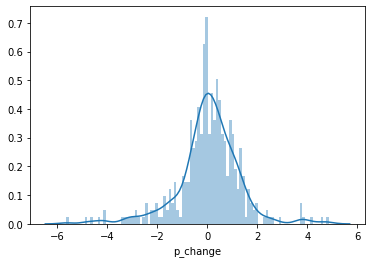

In [3]:
import seaborn as sns

sns.distplot(amex_df['p_change'],
             bins=100,
             label="AXP Daily Price Change")


# Initialize Strategy 

Let's create a strategy which will buy the stock when there's more than 3% change in the daily rise of the stock price.

We will then hold this for 5 days. 

In [8]:
import import_ipynb
from strategy_1 import TradeStrategy1

p_change = 3 # Long / Short stock when there's 3% or more change in price change
keep_stock = 5 # Then keep stock for 5 days
strategy = TradeStrategy1(p_change_threshold=p_change, 
                          s_hold_stock_threshold=keep_stock,
                          should_log=True, 
                          should_plot=False)

# Testing Strategy 

We will iterate through all trade days, and let strategy decide whether or not it should buy/sell.

Finally, we will print the strategy of the result.

In [9]:
for date, trade_day in amex_df.iterrows():
    strategy.trade(date=date,
                   tradeday=trade_day)
print("Strategy1 Yielded: {}% with p_change: {}, keep_stock: {}.".format(round(strategy.trade_profit*100, 2), p_change, keep_stock))

Bought on 2018-02-02 00:00:00 at $96.68.
Sold on 2018-02-08 00:00:00 at $88.34.
Bought on 2018-02-09 00:00:00 at $91.72.
Sold on 2018-02-15 00:00:00 at $96.56.
Bought on 2018-03-13 00:00:00 at $95.37.
Sold on 2018-03-19 00:00:00 at $94.05.
Bought on 2018-03-22 00:00:00 at $91.41.
Sold on 2018-03-28 00:00:00 at $92.21.
Bought on 2018-04-18 00:00:00 at $98.28.
Sold on 2018-04-24 00:00:00 at $100.44.
Bought on 2018-05-29 00:00:00 at $97.72.
Sold on 2018-06-04 00:00:00 at $99.45.
Bought on 2018-10-19 00:00:00 at $106.73.
Sold on 2018-10-25 00:00:00 at $103.56.
Bought on 2018-11-26 00:00:00 at $109.68.
Sold on 2018-11-30 00:00:00 at $112.27.
Bought on 2018-12-04 00:00:00 at $107.64.
Sold on 2018-12-11 00:00:00 at $105.4.
Bought on 2018-12-17 00:00:00 at $101.18.
Sold on 2018-12-21 00:00:00 at $91.33.
Bought on 2018-12-26 00:00:00 at $93.84.
Strategy1 Yielded: 4.85% with p_change: 3, keep_stock: 5.
